# Neural Networks - Deep Learning #
## Iordanis Kokkinidis - 3412 ##
## *1st Project (Intermediate)* ##



 *This is the Intermediary project for the Neural Networks - Deep Learning course in the Computer Science Department of the Aristotle University of Thessaloniki*

 In this project we are going to use SK Learn's Nearest Neighbors and Nearest Centroid classifiers, in order to classify the handwritten digits from the MNIST Dataset.
 Below, we will talk a little bit about the data, and the classifiers used, while comparing their performance.

 Going forward, our goal for the first project is to create a Neural Network from scratch (using Python and numPy) to recognize the handwritten digits of the MNIST Dataset and compare its performance to the three classifiers below. 


We start by importing some standard libraries that we will need. We import numpy, so that we can use it for storing our data in np.arrays (matrices and vectors). We import pyPlot, that we are going to use for creating our charts. We also import the neighbors library from sklearn, in order to use the `KNeighborsClassifier()` and the `NearestCentroid()` classifiers. Last but not least, we import the mnist dataset from keras.datasets, which holds 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [1]:
# We need to run this cell in order for the other cells to run.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from keras.datasets import mnist 
import time
import random

%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

## Loading the data ##

We load the data from the `mnist.dataset`, using `mnist.load_data()` and store each NumPy array in the appropriate NumPy array. For example, we have X_train containing the images of the training set and y_train containing the labels of the training set.

We then reshape the X_train and X_test NumPy arrays from (60000, 28, 28) and (10000,  28, 28) to (60000, (28 \* 28)) and  (10000, (28 \* 28)) respectively, basically transforming each image's 28 \* 28 pixel matrix to a a vector.
We also keep the original dataset in the X_train_og and X_test_og NumPy arrays, in order to use them later when we want to plot the (28 \* 28) images.

In [177]:
def load_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  X_train_og = X_train
  X_test_og = X_test
  X_train = X_train.reshape(60000, (28*28))
  X_test = X_test.reshape(10000, (28*28))
  return X_train, y_train, X_test, y_test, X_train_og, X_test_og

#### Loading the data in X_train, y_train, X_test, y_test, X_train_og and X_test_og arrays. ####

We use the function defined above to load our data. 

In [178]:
X_train, y_train, X_test, y_test, X_train_og, X_test_og = load_data()



---


## K Nearest Neighbors Classifier ## 

In the function below defined below, we use SKLearn's KNeighborsClassifier to define our knn classifier and return it. This function takes a parameter k, which is the number of neighbors we want to use with our classifier.

In [179]:
def define_knn(k):
  knn = neighbors.KNeighborsClassifier(k)
  return knn

---


## Nearest Centroid Classifier ##

In the same way as with the KNeighborsClassifier, we define our NearestCentroid classifier and return it.

In [180]:
def define_ncc():
  ncc = neighbors.NearestCentroid()
  return ncc

---
## Fitting the data in a classifier ##

This function is used by both classifiers (KNN and NearestCentroid) to fit the classifier's model according to the given training data (from SKLearn's documentation). The function takes as parameters a classifier (one of the two defined above), the training set data, **X** is an array of the image vectors and **y** is an array of the labels. For both the KNN and NearestCentroid classifiers, we use their _fit(X, y)_ method and then we return the classifier that is ready to make predictions on the test set.

In [181]:
def fit_data(classifier, X, y):
  classifier.fit(X, y)
  return classifier

---

### Defining the classifiers and Getting predictions. ###

Below we define three functions, each corresponding to one of the classifier's we want to test (_**KNN** with k=1_, _**KNN** with k=3_ and _**NearestCentroid**_ classifiers). Each of these functions takes **X_train** **X_test** and **y_train** arrays as parameters and behaves the same way. First, they define the appropriate classifier (_The first two also have a variable **k**, that is the **number of neighbors** we want to use in the **KNearestNeighbor classifier**_) and then call on the _fit_data( )_ function giving the classifier and training set arrays (X_train, y_train) as parameters.

Then, we use the _time.process_time( )_ function to set a start_time variable (and subsequently an end_time) in order to time how long it takes for the classifier to make predictions on the test set of 10,000 images. For that, we use the _[classifier].predict( )_ function (where classifier is one of our classifiers, **knn** or **ncc**) that takes the **X_test** array of image vectors as a parameter (our test set) and performs classification on that given test data (predicts the label that the test set data have). The predictions that the classifier makes are returned and stored in the predictions array, in order to be returned to the main driver progam, along with the delta_time (time elapsed while the classifier was making predictions _[classifier].predict(X_test)_).

In [182]:
def knn1_predictions(X_train, X_test, y_train):
  k = 1
  knn = define_knn(k)
  fit_data(knn, X_train, y_train)
  start_time = time.process_time()
  predictions = knn.predict(X_test)
  end_time = time.process_time()
  delta_time = (end_time - start_time) * 1000
  delta_time = round(delta_time)
  print("Made predictions with KNN Classifier with k = 1")
  print("Time: " + str(delta_time) + "ms")
  return predictions, delta_time

def knn3_predictions(X_train, X_test, y_train):
  k = 3 
  knn = define_knn(k)
  fit_data(knn, X_train, y_train)
  start_time = time.process_time()
  predictions = knn.predict(X_test)
  end_time = time.process_time()
  delta_time = (end_time - start_time) * 1000
  delta_time = round(delta_time)
  print("Made predictions with KNN Classifier with k = 3")
  print("Time: " + str(delta_time) + "ms")
  return predictions, delta_time

def ncc_predictions(X_train, X_test, y_train):
  ncc = define_ncc()
  fit_data(ncc, X_train, y_train)
  start_time = time.process_time()
  predictions = ncc.predict(X_test)
  end_time = time.process_time()
  delta_time = (end_time - start_time) * 1000
  delta_time = round(delta_time)
  print("Made predictions with the NCC Classifier.")
  print("Time: " + str(delta_time) + "ms")
  return predictions, delta_time


---

## Showing Images of our data ##

_The function below is used to show an image of our data, given an **index** (which sample we want to show) and the **X** and **Y** NumPy arrays of the data set_. We must use the **X_train_og** and **X_test_og** arrays, since we kept them in dimensions of _(60000, (28 \* 28))_ and _(10000, (28 \* 28))_ respectively. We use the _matplotlib library_ in order to plot the images of our data samples.

In [183]:
def image_show(index, X, Y):
  image = X[index]
  fig = plt.figure
  plt.imshow(image, cmap='gray')
  print("Showing sample data " + str(index) + " with label: " + str(Y[index]))
  plt.show()

##### _Run the code below, to see a random data sample from the training set_ #####

Showing sample data 21586 with label: 0


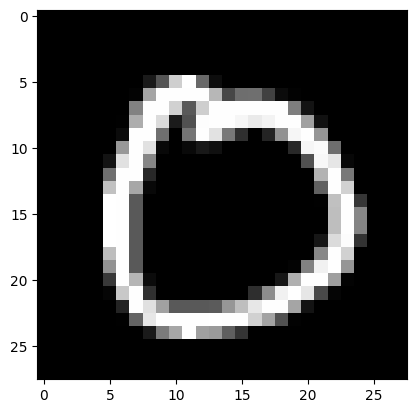

In [184]:
index = random.randrange(0,60000)
image_show(index, X_train_og, y_train)

---

### Printing the predictions ###

We have defined a method below, that prints the predictions of a classifier. The function takes as parameters the predictions array, which is the predictions of a classifier we want to print, the X_test_og array, in order to plot the image of the samples if we want, the y_test which is the array that holds the labels of our dataset, and two boolean variables called print_wrong_predictions and print_correct_predictions, so that we can specify what kind of predictions (or both) we want to see. It also takes a number_of_predictions parameter, that specifies how many predictions we want to see. This number must be between 1 and 10,000, although setting it to a large number might not be the optimal choice.

In this function, we use a pseudo-random number generator to generate a number between 0 and 10,000, that is the index of the data sample we are going to print, in order to show a number of different predictions each time and not all of them, since that will take some time and the output will not be very readable.

When an index is generated, we check if the `predictions[index]` is equal to the `y[index]` in order to determine if the prediction was correct or not. This is not only done so that we can accompany the image of our data sample with the appropriate label (i.e., the prediction was CORRECT!), but also to allow the user to only print correct or wrong predictions if he wishes.

*This works better if you run the python file and not the notebook*

In [185]:
def print_predictions(predictions, X, y, print_wrong_predictions, print_correct_predictions, number_of_predictions_to_print):
  for i in range(0, number_of_predictions_to_print):
    index = random.randrange(0,10000)
    if((predictions[index] != y[index])):
      if(print_wrong_predictions):
        image_show(index,X, y)
        print("Classifier's prediction: " , predictions[index])
        print("The prediction was WRONG!")
        print("The correct label is: ", y_test[index])
        print("\n")
    else:
      if(print_correct_predictions):
        image_show(index,X, y)
        print("Classifier's prediction: " , predictions[index])
        print("The prediction was CORRECT!")
        print("\n")

---
### Getting the wrong predictions ###

The function below is used to get the wrong predictions and the number of wrong predictions that a classifier has made. It takes as parameters the predictions of the classifier and the y (y_test) array, which holds the labels for our test data. We iterate through the predictions array `for i in range(1, 10000)` and check if the `predictions[i]` is not equal to the `y[i]`. If yes, then the `wrong_predictions_total`is incremented and that prediction is put in the wrong_predictions array. We finally return the `wrong_predictions` array and the `wrong_predictions_total`.

In [186]:
def get_wrong_predictions(predictions, y):
  wrong_predictions = []
  wrong_predictions_total = 0
  for i in range(1, 10000):
    if((predictions[i] != y[i])):
      wrong_predictions_total += 1
      wrong_predictions.append(i)
  return wrong_predictions, wrong_predictions_total

### Getting a classifier's accuracy ###

This function is used to calculate the accuracy of a classifier's predictions. It simply takes as a parameter the `wrong_predictions` number of a classifier and return the percentage of correct predictions.
Since the test set contains 10,000 data samples, we divide the number of `wrong_predictions` by that and to get error. Then, we subtract that error from 1, to get the accuracy, that we multiply by a hundred to present it as a percentage (%).   

In [187]:
def get_accuracy(wrong_predictions):
  return ((1-(wrong_predictions/10000)) * 100)

---

## Driver Program ##
##### The cell below is the main part of the program that loads the data on the three classifiers and for each one gets the predictions, accuracy, time, wrong predictions and can even call a function to print the correct and/or wrong predictions #####

We want to test each classifier on the MNIST dataset that we loaded above.

We set the print_wrong_predictions and print_correct_predictions for each classifier block of code, depending on what prefferences we have on the output. For example if we want to see the wrong predictions of the NearestCentroid classifier, but not of the KNearestNeighbor classifiers. ***Feel free to change those variables however you see fit.***

Then for each classifier, we get the predictions and the time it took to make them by using the appropriate function (those that were defined above). We also get the wrong predictions for each classifier, by using the `get_wrong_predictions()` funciton. Finally, we get the accuracy for each classifier, using the `get_accuracy()` method.
We have all the data we need from the classification process and we call on the `print_predictions()` method to print the predictions of each classifier, as explained above.

In [202]:
print_wrong_predictions = False
print_correct_predictions = False
number_of_predictions_to_print = 50

predictions, time1 = knn1_predictions(X_train, X_test, y_train)
wrong_predictions, wrong_predictions_total = get_wrong_predictions(predictions, y_test)
print(str(wrong_predictions_total) + " wrong predictions out of 10,000 predictions")  
accuracy = get_accuracy(wrong_predictions_total)
print("Accuracy: " + str(accuracy) + "%\n")
# print("Printing prediction's of KNearest Neighbor Classifier with k = 1")
print_predictions(predictions, X_test_og, y_test, print_wrong_predictions, print_correct_predictions, number_of_predictions_to_print)
print("\n")

print_wrong_predictions = False
print_correct_predictions = False
number_of_predictions_to_print = 50

predictions2, time2 = knn3_predictions(X_train, X_test, y_train)
wrong_predictions2, wrong_predictions_total2 = get_wrong_predictions(predictions2, y_test)
print(str(wrong_predictions_total2) + " wrong predictions out of 10,000 predictions")
accuracy2 = get_accuracy(wrong_predictions_total2)
print("Accuracy: " + str(accuracy2) + "%\n")
# print("Printing prediction's of KNearest Neighbor Classifier with k = 3")
print_predictions(predictions2, X_test_og, y_test, print_wrong_predictions, print_correct_predictions, number_of_predictions_to_print)
print("\n")

print_wrong_predictions = False
print_correct_predictions = False
number_of_predictions_to_print = 50

predictions3, time3 = ncc_predictions(X_train, X_test, y_train)
wrong_predictions3, wrong_predictions_total3 = get_wrong_predictions(predictions3, y_test)
print(str(wrong_predictions_total3) + " wrong predictions out of 10,000 predictions")
accuracy3 = get_accuracy(wrong_predictions_total3)
print("Accuracy: " + str(accuracy3) + "%\n")
# print("Printing prediction's of Nearest Centroid Classifier")
print_predictions(predictions3, X_test_og, y_test, print_wrong_predictions, print_correct_predictions, number_of_predictions_to_print)
print("\n")



Made predictions with KNN Classifier with k = 1
Time: 100328ms
309 wrong predictions out of 10,000 predictions
Accuracy: 96.91%



Made predictions with KNN Classifier with k = 3
Time: 102625ms
295 wrong predictions out of 10,000 predictions
Accuracy: 97.05%



Made predictions with the NCC Classifier.
Time: 203ms
1797 wrong predictions out of 10,000 predictions
Accuracy: 82.03%





## Run the code cell below to get the charts comparing the accuracy of the two KNN classifiers. ## 

Results


<Figure size 640x480 with 0 Axes>

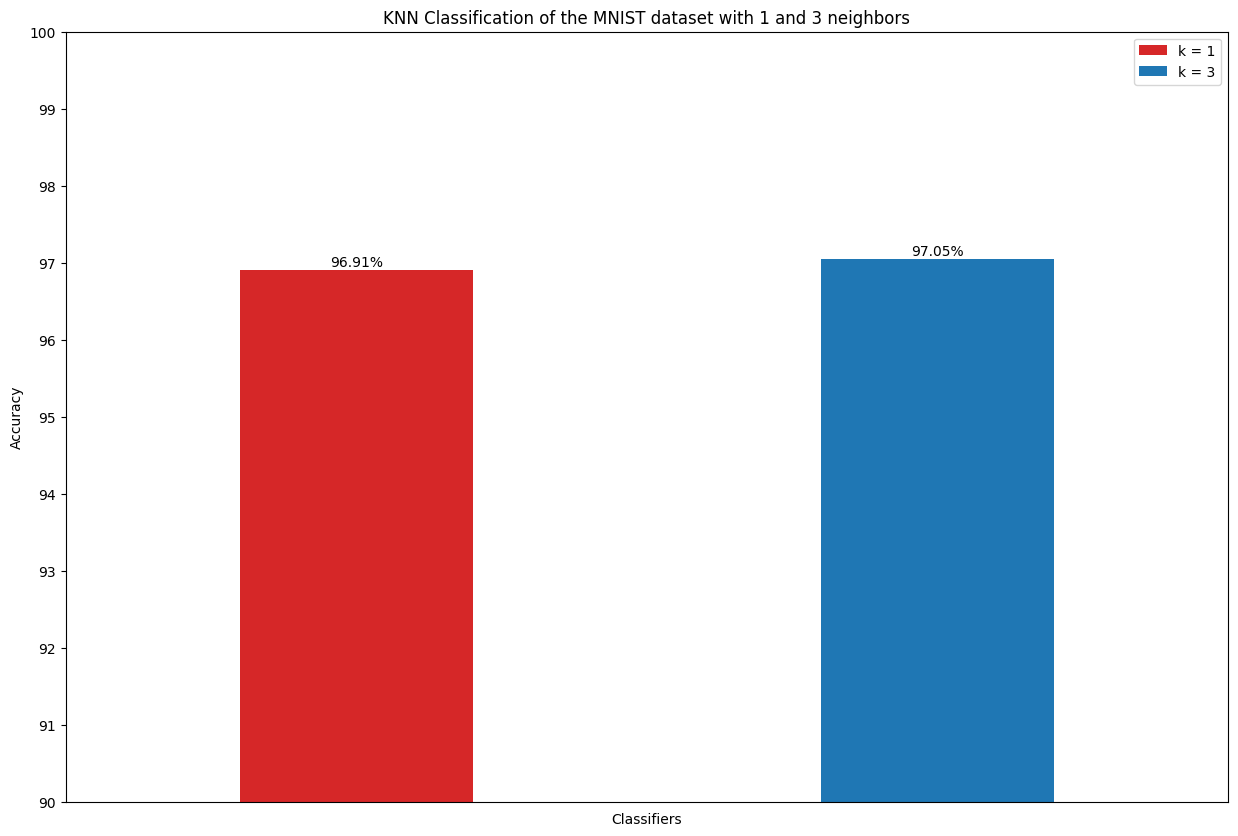

In [189]:
X = [1, 3]
scores = [accuracy,accuracy2]
bar_colors = ['tab:red', 'tab:blue']
plt.figure(1)
plt.figure(figsize = (15,10))
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title('KNN Classification of the MNIST dataset with 1 and 3 neighbors')
plt.ylim(90,100)
plt.xlim(0,4)
plt.yticks([90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
plt.xticks([])
plt.bar(X, scores, color=bar_colors, label=['k = 1', 'k = 3'])
plt.annotate("" + str(scores[0]) + "%", xy = (X[0],scores[0]), ha='center', va='bottom')
plt.annotate("" + str(scores[1]) + "%", xy = (X[1],scores[1]), ha='center', va='bottom')
print("Results")
plt.legend()
plt.show()

## Run the code cell below to get the charts comparing the accuracy of the NCC classifier and the two KNN classifiers. ## 

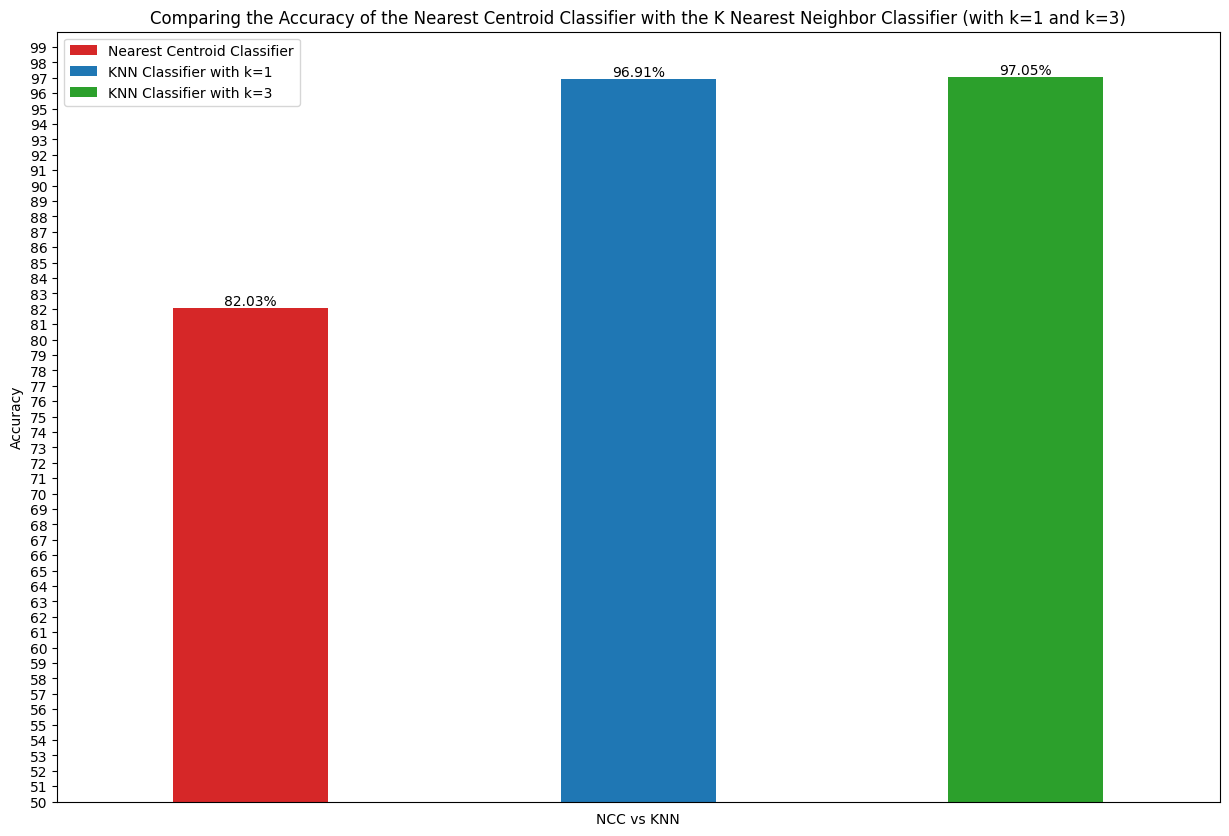

In [190]:
X2 = [1, 3, 5]
scores2 = [accuracy3, accuracy, accuracy2]
bar_colors = ['tab:red', 'tab:blue', 'tab:green']
plt.figure(figsize = (15,10))
plt.xlabel("NCC vs KNN")
plt.ylabel("Accuracy")
plt.title('Comparing the Accuracy of the Nearest Centroid Classifier with the K Nearest Neighbor Classifier (with k=1 and k=3)')
plt.ylim(50,100)
plt.xlim(0,6)
plt.yticks(range(50, 100))
plt.xticks([])
plt.bar(X2, scores2, color=bar_colors, label=['Nearest Centroid Classifier', 'KNN Classifier with k=1', 'KNN Classifier with k=3'])
plt.annotate("" + str(scores2[0]) + "%", xy = (X2[0],scores2[0]), ha='center', va='bottom')
plt.annotate("" + str(scores2[1]) + "%", xy = (X2[1],scores2[1]), ha='center', va='bottom')
plt.annotate("" + str(scores2[2]) + "%", xy = (X2[2],scores2[2]), ha='center', va='bottom')
plt.legend()
plt.show()

## Run the code cell below to get the chart comparing the time for training each classifier. ## 

[266, 105109, 104375]
105109


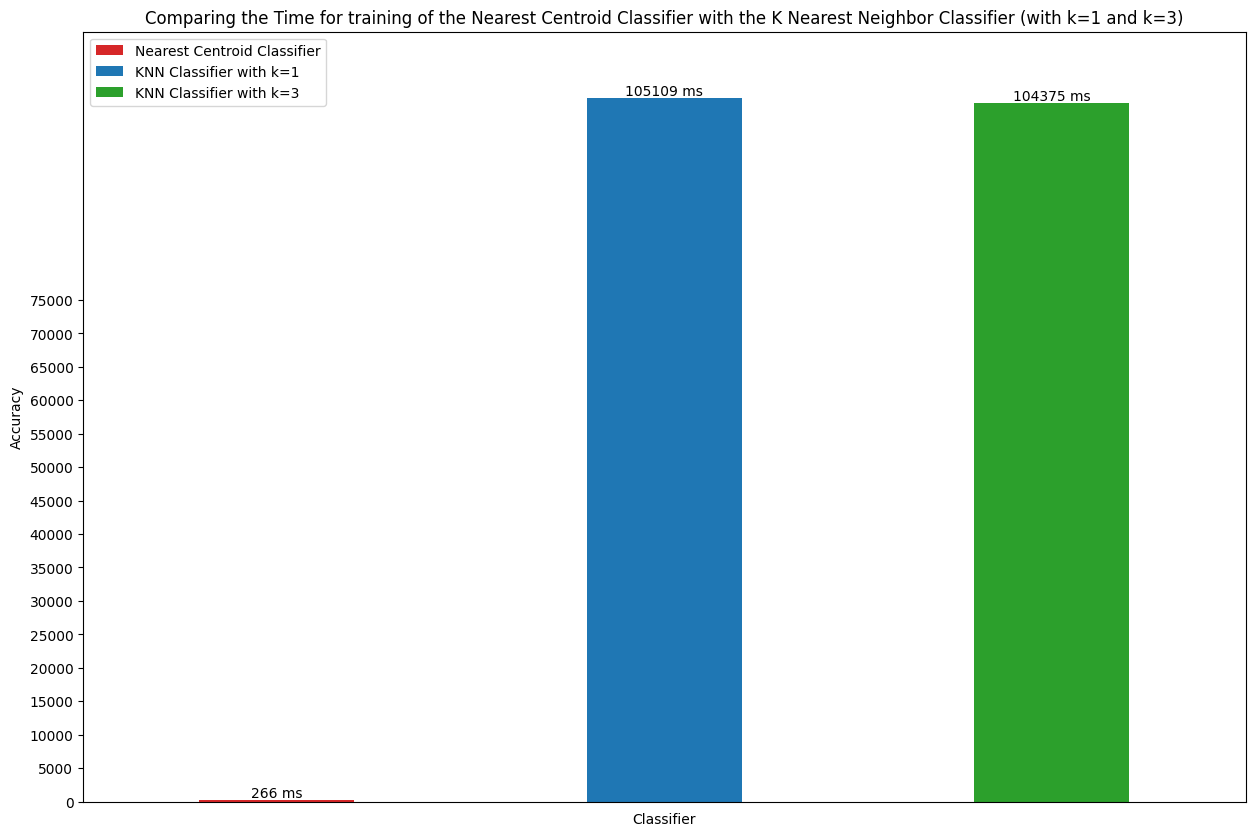

In [200]:
X2 = [1, 3, 5]
times = [time3, time1, time2]
print(times) 
print(np.max(times))
bar_colors = ['tab:red', 'tab:blue', 'tab:green']
plt.figure(figsize = (15,10))
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title('Comparing the Time for training of the Nearest Centroid Classifier with the K Nearest Neighbor Classifier (with k=1 and k=3)')
plt.ylim(0, np.max(times) + 10000)
plt.xlim(0,6)
plt.yticks(range(0,78000, 5000))
plt.xticks([])
plt.bar(X2, times, color=bar_colors, label=['Nearest Centroid Classifier', 'KNN Classifier with k=1', 'KNN Classifier with k=3'])
plt.annotate("" + str(times[0]) + " ms", xy = (X2[0],times[0]), ha='center', va='bottom')
plt.annotate("" + str(times[1]) + " ms", xy = (X2[1],times[1]), ha='center', va='bottom')
plt.annotate("" + str(times[2]) + " ms", xy = (X2[2],times[2]), ha='center', va='bottom')
plt.legend()
plt.show()